In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv("titanic_toy.csv")

In [6]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [9]:
df.isnull().mean()*100  #age has 19% data missing and fare has 5% data missing 

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [12]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [15]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [16]:
X_test.isnull().mean()

Age       0.162011
Fare      0.050279
Family    0.000000
dtype: float64

In [17]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [26]:
mean_age , median_age , mean_fare , median_fare


(29.78590425531915, 28.75, 32.61759689349112, 14.4583)

In [20]:
X_train["Age_mean"] = X_train["Age"].fillna(mean_age)
X_train["Age_median"] = X_train["Age"].fillna(median_age)

X_train["Fare_mean"] = X_train["Fare"].fillna(mean_fare)
X_train["Fare_median"] = X_train["Fare"].fillna(median_fare)


In [22]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
519,32.0,7.8958,0,32.000000,32.00,7.8958,7.8958
825,NaN,6.9500,0,29.785904,28.75,6.9500,6.9500
474,22.0,9.8375,0,22.000000,22.00,9.8375,9.8375
616,34.0,14.4000,2,34.000000,34.00,14.4000,14.4000
611,NaN,7.0500,0,29.785904,28.75,7.0500,7.0500


In [27]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())   # after appling the imputation the variance sholud not chanege so much here
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())         # the age variance is change so much it's not good 

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())     # after appling the imputation the varince is change but not too much it 
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())          # it is better for the imputation 

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


<Axes: ylabel='Density'>

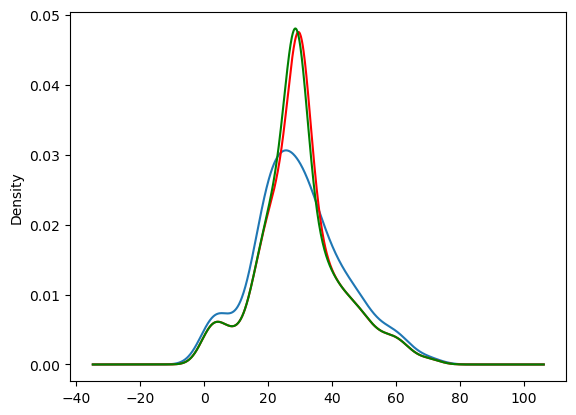

In [35]:
fig = plt.figure()
ax = fig.add_subplot()


# original variable distribution
X_train["Age"].plot(kind='kde', ax=ax)

# variable imputed with the mean
X_train["Age_mean"].plot(kind='kde', ax=ax, color='red')

# variable imputed with the median
X_train["Age_median"].plot(kind='kde', ax=ax, color='green')


# ON age the imputation is not good there is to much variation after filling the missing value 

<Axes: ylabel='Density'>

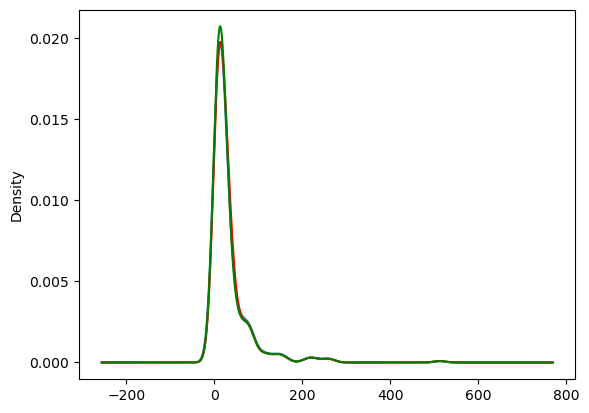

In [38]:
fig = plt.figure()
ax = fig.add_subplot()

# original variable distribution
X_train["Fare"].plot(kind='kde', ax=ax)

# variable imputed with the mean
X_train["Fare_mean"].plot(kind='kde', ax=ax, color='red')

# variable imputed with the median
X_train["Fare_median"].plot(kind='kde', ax=ax, color='green')


# it is good there is very less variation after filling the missing value in fare

In [39]:
X_train.cov()    # Co-varience sholuld not have big difference 

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [40]:
X_train.corr()  # co- realation

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

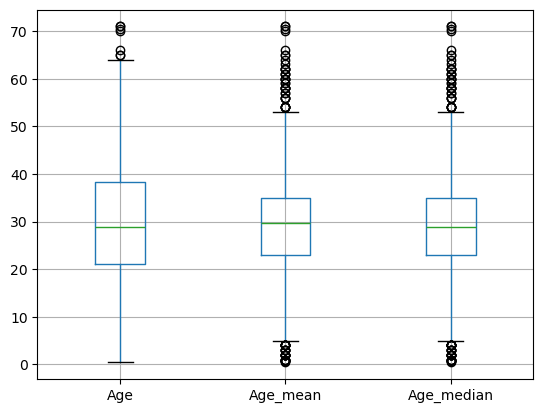

In [43]:
X_train[["Age","Age_mean","Age_median"]].boxplot()     # it increace the outlyer in the data after imputation

<Axes: >

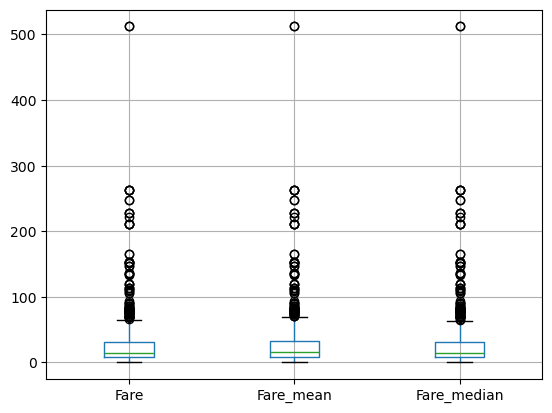

In [44]:
X_train[["Fare","Fare_mean","Fare_median"]].boxplot()    # it is same as previous 

## We use imputation on fare only it donot have sever change in the data after imputation  it has no outlayer and variation in graph is also less

# Using sklear

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [47]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [48]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [49]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [50]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [51]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [52]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])